**<h1> Pillow Library (PIL)</h1>**


Estimated time needed: **60** minutes


<h2>Objectives</h2>


Image processing and computer vision tasks include displaying, cropping, flipping, rotating,  image segmentation, classification, image restoration,  image recognition, image generation.  Also, working with images via the cloud requires storing, transmitting, and gathering images through the internet. 

Python is an excellent choice as it has many image processing tools, computer vision and artificial intelligence libraries. Finally, it has many libraries for working with files in the cloud and on the internet.

A digital image is simply a file in your computer. In this lab, you will gain an understanding of these files and learn to work with these files with the Pillow Library (PIL).


<ul>
    <li><a href='#PIL'>Python Image Libraries </a>
        <ul>
            <li>Image Files and Paths  </li>
            <li>Load in Image in Python</li>
            <li>Plotting an Image </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
            <li> PIL Images into NumPy Arrays  </li>
        </ul>
    </li>
    
</ul>


----


Download the images for the lab:


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

'wget' is not recognized as an internal or external command,
operable program or batch file.


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


First, let's define a helper function to concatenate two images side-by-side. You will not need to understand the code below at this moment, but this function will be used repeatedly in this tutorial to showcase the results.


In [ ]:
def get_concat_h(im1, im2): #định nghĩa hàm get_concat_h(): để ghép 2 ảnh theo chiều ngang
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new('RGB', (im1.width + im2.width,      #tạo ảnh mới,chiều rộng = tổng chiều rộng 2 ảnh,
                            im1.height))                #chiều cao = chiều cao của ảnh 1 
    dst.paste(im1, (0, 0)) #dán ảnh 1  ở vị trí góc trái
    dst.paste(im2, (im1.width, 0)) # dán ảnh 2 ở vị trí bắt đầu từ tọa độ (ảnh 1, 0) 
    return dst # trả về ảnh đã ghép 

## Image Files and Paths  


An image is stored as a file on your computer. Below, we define `my_image` as the filename of a file in this directory.


In [ ]:
my_image = "lenna.png" #gán file ảnh bằng biến my_image 

A filename consists of two parts: the name of the file and the extension, separated by a full stop (`.`). The extension specifies the format of the Image. There are two popular image formats: Joint Photographic Expert Group image (or `.jpg`, `.jpeg`) and Portable Network Graphics (or `.png`). These file types make it simpler to work with images. For example, it compresses the image, taking less spaces on your drive to store the image.


Image files are stored in the file system of your computer. The location of it is specified using a "path", which is often unique. You can find the path of your current working directory with Python's `os` module. The `os` module provides functions to interact with the file system, e.g. creating or removing a directory (folder), listing its contents, changing and identifying the current working directory. 


In [ ]:
import os  #import thư viện os để làm việc với hệ điều hành
cwd = os.getcwd() # lấy thư mục làm việc hiện tại 
cwd  #in ra đường dẫn thư mục hiện tại 

'c:\\YYYYY\\NAM BA\\HKII\\CV\\BUOI1'

The "path" to an image can be found using the following line of code.


In [ ]:
image_path = os.path.join(cwd, my_image)  # Ghép đường dẫn thư mục hiện tại với tên file ảnh
image_path  # in ra đường dẫn 

'c:\\YYYYY\\NAM BA\\HKII\\CV\\BUOI1\\lenna.png'

## Load Images in Python


Pillow (PIL) library is a popular library for loading images in Python. In addition, many other libraries such as "Keras" and "PyTorch" use this library to work with images. The `Image` module provides functions to load images from and saving images to the file system. Let's import it from `PIL`.


In [ ]:
from PIL import Image # Import lớp Image từ thư viện Pillow để xử lý ảnh

If the image is in the current working directory, you can load the image as follows using the image's filename and create a PIL Image object:


In [ ]:
image = Image.open(my_image)   # Mở file ảnh (lenna.png) và lưu vào biến image
type(image) # Kiểm tra kiểu dữ liệu của biến image

PIL.PngImagePlugin.PngImageFile

If you are working in a Jupyter environment, you can view the image by calling the variable itself.  


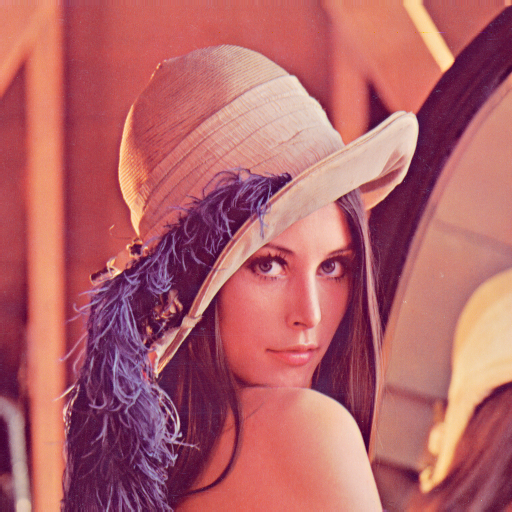

In [8]:
image

##  Plotting an Image 


We can also use the method `show` of PIL objects to display the image. Please note this method may or may not work depending on your setup.


In [ ]:
image.show()  # Hiển thị ảnh ra màn hình bằng trình xem ảnh mặc định

You can also use <code>imshow</code> method from the <code>matplotlib</code> library to display the image.


In [ ]:
import matplotlib.pyplot as plt  # Import thư viện matplotlib để vẽ biểu đồ và hiển thị ảnh

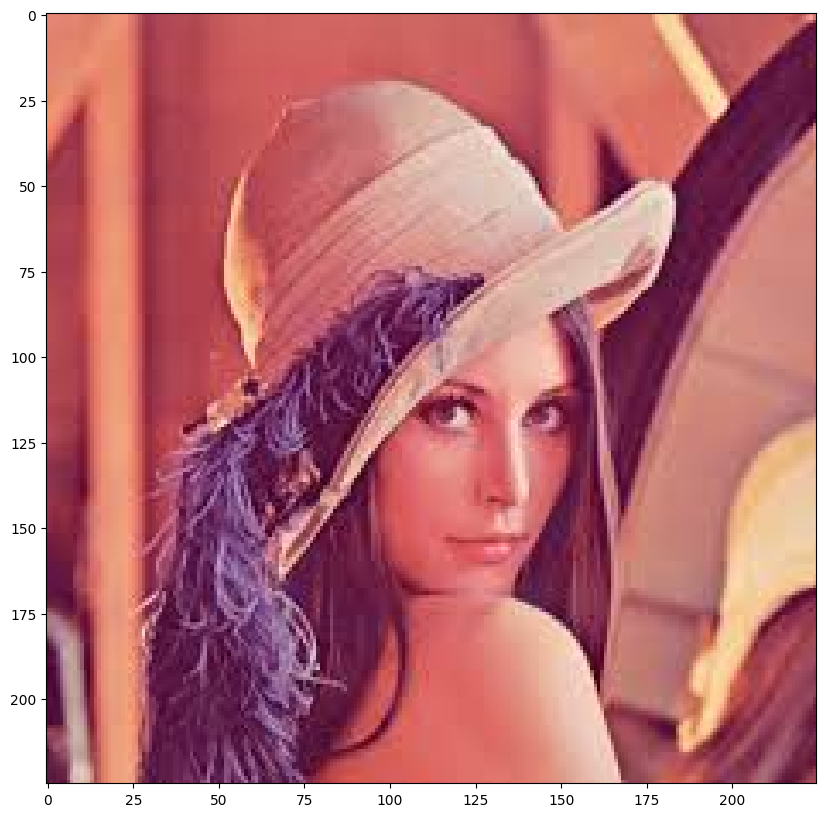

In [ ]:
plt.figure(figsize=(10,10)) # Tạo khung hiển thị, kích thước 10x10 
plt.imshow(image)  # Hiển thị ảnh lên khung
plt.show() # hiển thị ảnh lên màn hình 

You can also load the image using its full path. This comes in handy if the image is not in your working directory.


In [ ]:
image = Image.open(image_path)   # Mở ảnh bằng đường dẫn đầy đủ và lưu vào biến image

We can use the attributes of the image object to get information. The attribute format is the extension or format of the image.


The attribute `size` returns a tuple, the first element is the number of pixels that comprise the width and the second element is the number of pixels that make up the height of the image.   


In [ ]:
print(image.size) # in ra kích thước ảnh ( weight và high) theo pixel

(225, 225)


This is a string specifying the pixel format used. In this case, it's “RGB”. RGB is a color space where red, green, and blue are added together to produce other colors.



In [ ]:
print(image.mode)  # In ra chế độ màu của ảnh

RGB


The `Image.open` method does not load image data into the computer memory. The `load` method of `PIL` object reads the file content, decodes it, and expands the image into memory.


In [ ]:
im = image.load()   # Nạp dữ liệu pixel của ảnh để truy cập/chỉnh sửa từng pixel

We can then check the intensity of the image at the $x$-th column and $y$-th row:


In [ ]:
x = 0          # Gán tọa độ x = 0
y = 1          # Gán tọa độ y = 1
im[y, x]       # Lấy giá trị màu của pixel tại vị trí (x=0, y=1)

(230, 134, 118)

We will use the array form to access the elements; it is slightly different.


You can save the image in `jpg` format using the following command.


In [ ]:
image.save("lenna.jpg")  # Lưu ảnh hiện tại thành file lenna.jpg

## Grayscale Images, Quantization and Color Channels  


### Grayscale Images


The `ImageOps` module contains several ‘ready-made’ image processing operations. This module is somewhat experimental, and most operators only work with grayscale and/or RGB images.


In [ ]:
from PIL import ImageOps  # Import ImageOps để xử lý ảnh đơn giản (đảo màu, chuyển xám…)

Grayscale images have pixel values representing the amount of light or intensity of that pixel. Light shades of gray have a high-intensity while darker shades have a lower intensity, i.e, white has the highest intensity and black the lowest.


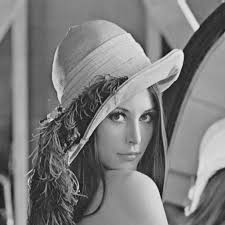

In [ ]:
image_gray = ImageOps.grayscale(image)  # Chuyển ảnh màu sang ảnh xám (grayscale)
image_gray  # hiển thị ảnh đã chuyển 

The mode is `L` for grayscale.


In [ ]:
image_gray.mode     # chế độ màu của ảnh xám

'L'

### Quantization


The Quantization of an image is the number of unique intensity values any given pixel of the image can take. For a grayscale image, this means the number of different shades of gray. Most images have 256 different levels. You can decrease the levels using the method `quantize`. Let's repeatably cut the number of levels in half and observe what happens:


Half the levels do not make a noticable difference.


In [ ]:
image_gray.quantize(256 // 2)   # Giảm số mức xám xuống còn 128 mức (256/2)
image_gray.show()  # hiển thị ảnh xám ra màn hình

Let’s continue dividing the number of values by two and compare it to the original image.


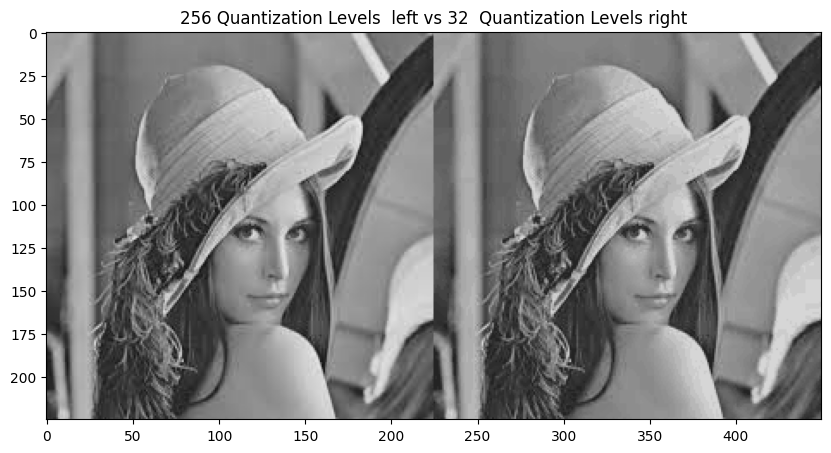

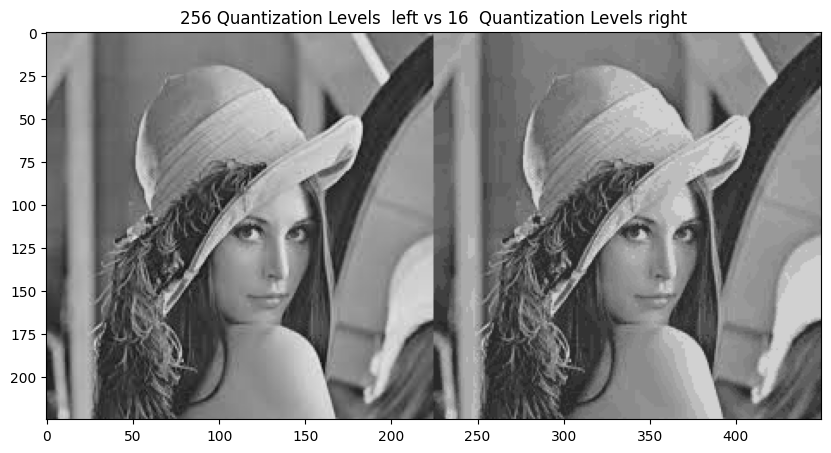

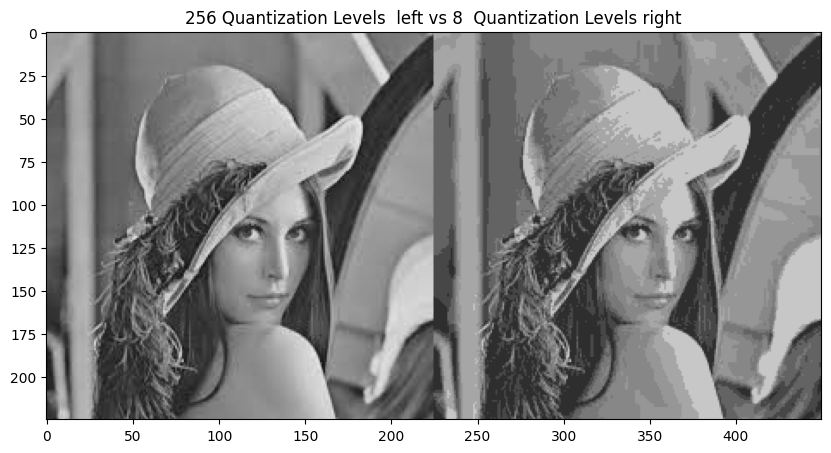

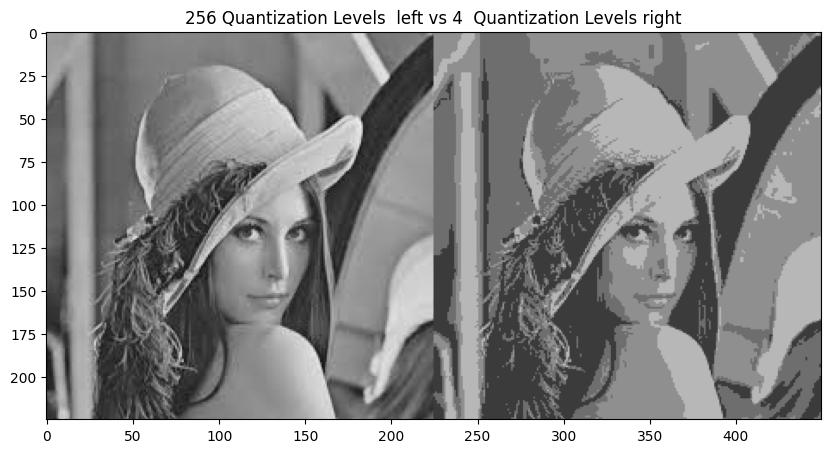

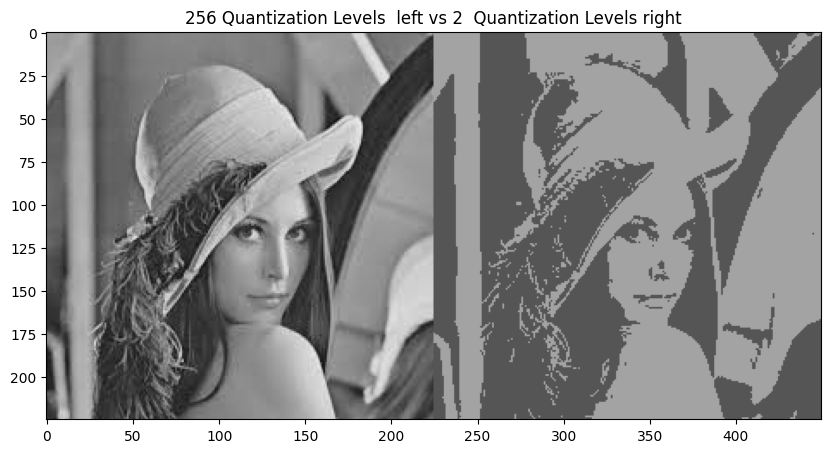

In [ ]:
#get_concat_h(image_gray,  image_gray.quantize(256//2)).show(title="Lena") 
for n in range(3,8):  # tạo vòng lặp n từ 3 - 7
    plt.figure(figsize=(10,10)) # kích thước khung hiển thị 10x10

    plt.imshow(get_concat_h(image_gray,  image_gray.quantize(256//2**n))) #hiển thị ảnh gốc (256 mức xám) bên trái và ảnh đã lượng tử hóa (256//2ⁿ mức xám) bên phải để so sánh.
    plt.title("256 Quantization Levels  left vs {}  Quantization Levels right".format(256//2**n))  #đặt tiêu đề cho hình kèm số mức xàm cho hình bên phải
    plt.show()   # hiển thị hình ra màn hình

### Color Channels  


We can also work with the different color channels. Consider the following image:


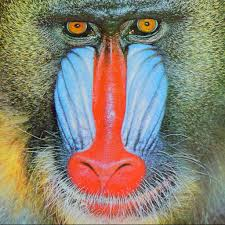

In [ ]:
baboon = Image.open('baboon.png')  # mở ảnh baboon.png và lưu vào biến baboon
baboon # hiển thị đối tượng 

We can obtain the different RGB color channels and assign them to the variables <code>red</code>, <code>green</code>, and <code>blue</code>:


In [ ]:
red, green, blue = baboon.split()  # Tách ảnh màu baboon thành 3 kênh: đỏ, xanh lá, xanh dương

Plotting the color image next to the red channel as a grayscale, we see that regions with red have higher intensity values.


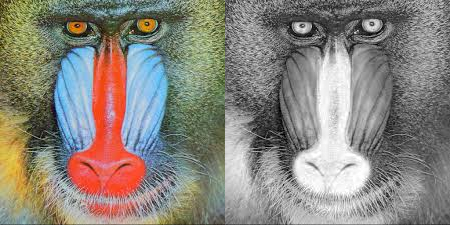

In [ ]:
get_concat_h(baboon, red)  # Ghép ảnh gốc baboon với kênh màu đỏ theo chiều ngan

We can do the same for the blue and green channels:


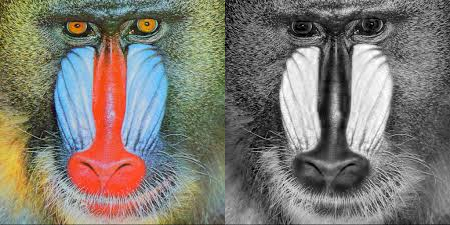

In [ ]:
get_concat_h(baboon, blue)  # Ghép ảnh gốc baboon với kênh màu xanh dương theo chiều ngang

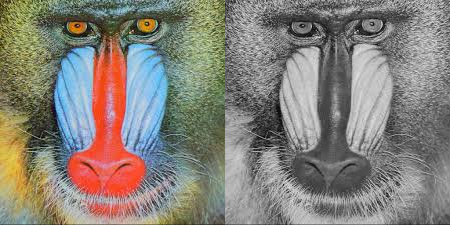

In [ ]:
get_concat_h(baboon, green)  # Ghép ảnh gốc baboon với kênh màu xanh lá theo chiều ngang

## PIL Images into NumPy Arrays


NumPy is a library for Python, allowing you to work with multi-dimensional arrays and matrices. We can convert a PIL image to a NumPy array. We use <code>asarray()</code> or <code>array</code> function from NumPy to convert PIL images into NumPy arrays. 

First, let's import the numpy module:


In [ ]:
import numpy as np  # import thư viện numpy để xử lý mảng & số học

We apply it to the <code>PIL</code> image we get a numpy array:


In [ ]:
array= np.asarray(image)   # Chuyển ảnh Pillow thành mảng NumPy
print(type(array))   # in ra kiểu dữ liệu của biến array

<class 'numpy.ndarray'>


`np.asarray` turns the original image into a numpy array. Often, we don't want to manipulate the image directly, but instead, create a copy of the image to manipulate. The `np.array` method creates a new copy of the image, such that the original one will remain unmodified.


In [ ]:
array = np.array(image)      # Chuyển ảnh thành mảng NumPy

The attribute  <code>shape</code> of a `numpy.array` object returns a tuple corresponding to the dimensions of it, the first element gives the number of rows or height of the image,  the second is element is the number of columns or width of the image. The final element is the number of colour channels.


In [ ]:
# summarize shape
print(array.shape)   #in ra kích thước 

(225, 225, 3)


or <code>(rows, columns, colors)</code>. Each element in the color axis  corresponds to the following value  <code>(R, G, B)</code> format.


We can view the intensity values by printing out the array, they range from 0 to 255 or $2^{8}$ (8-bit).


In [ ]:
print(array)  # in ra mảng

[[[230 134 118]
  [230 134 118]
  [229 133 117]
  ...
  [223 128 122]
  [242 149 141]
  [215 118 111]]

 [[229 133 117]
  [229 133 117]
  [229 133 117]
  ...
  [234 140 138]
  [248 157 154]
  [214 120 120]]

 [[229 133 117]
  [229 133 117]
  [228 133 115]
  ...
  [200 109 114]
  [194 104 113]
  [151  63  79]]

 ...

 [[ 87  31  68]
  [ 87  27  63]
  [ 90  24  60]
  ...
  [126  51  74]
  [139  58  77]
  [152  61  78]]

 [[ 87  31  66]
  [ 86  26  62]
  [ 89  23  59]
  ...
  [136  57  78]
  [151  66  85]
  [159  66  77]]

 [[ 77  20  52]
  [ 94  35  67]
  [ 91  25  61]
  ...
  [155  68  87]
  [167  73  89]
  [178  73  87]]]


The Intensity values are  8-bit unsigned datatype.


In [ ]:
array[0, 0]  #phần tử đầu tiên của mảng 2 chiều

array([230, 134, 118], dtype=uint8)

We can find the maximum and minimum intensity value of the array:      


In [40]:
array.min()

0

In [41]:
array.max()

255

### Indexing  


You can plot the array as an image:


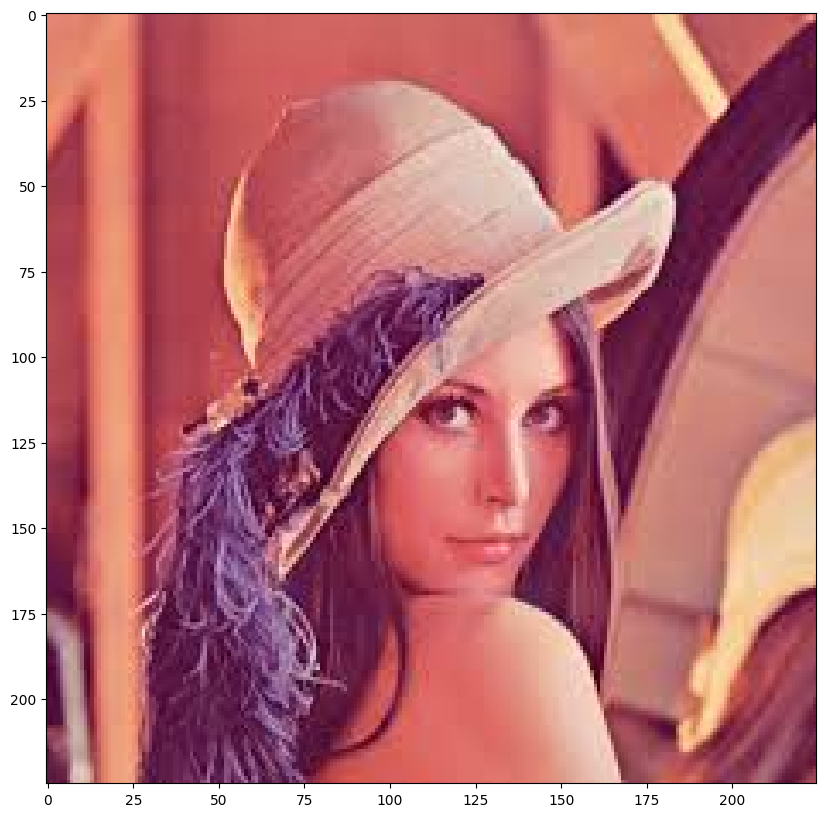

In [ ]:
plt.figure(figsize=(10,10))  # Tạo khung hiển thị kích thước 10x10 inch
plt.imshow(array)            # Hiển thị ảnh từ mảng NumPy
plt.show()                   # Hiển thị ảnh ra màn hình

We can use numpy slicing, for example, we can return the first 256 rows corresponding to the top half of the image:


In [43]:
rows = 256

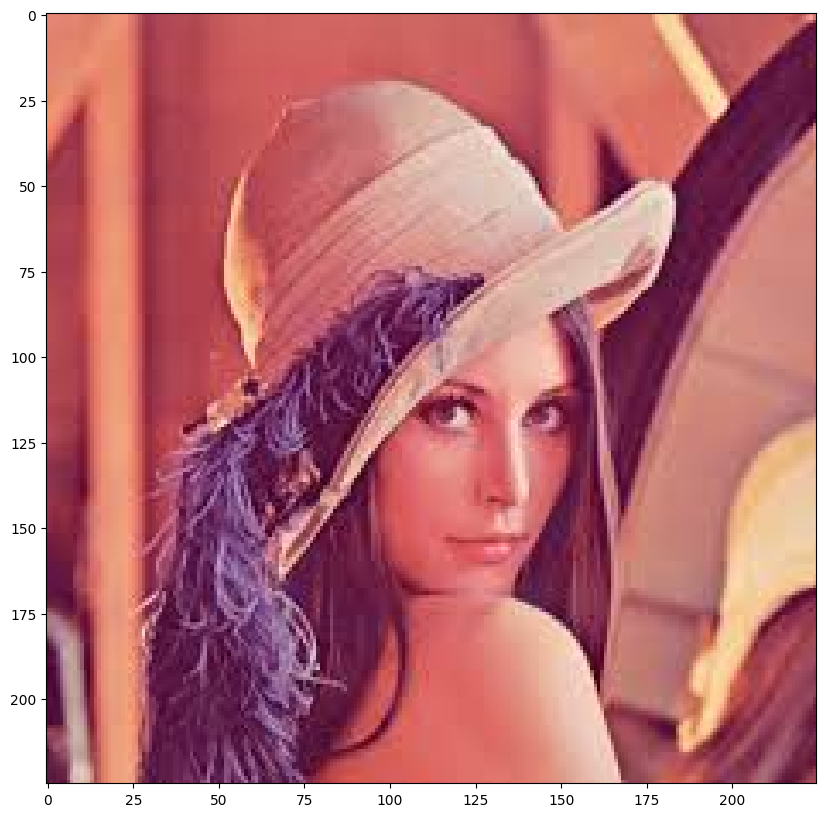

In [ ]:
plt.figure(figsize=(10,10))        # Tạo khung hiển thị kích thước 10x10
plt.imshow(array[0:rows, :, :])   # Lấy một phần ảnh theo chiều cao (từ hàng 0 đến rows)
plt.show()                        # Hiển thị ảnh

We can also return the first 256 columns corresponding to the first half of the image.


In [45]:
columns = 256

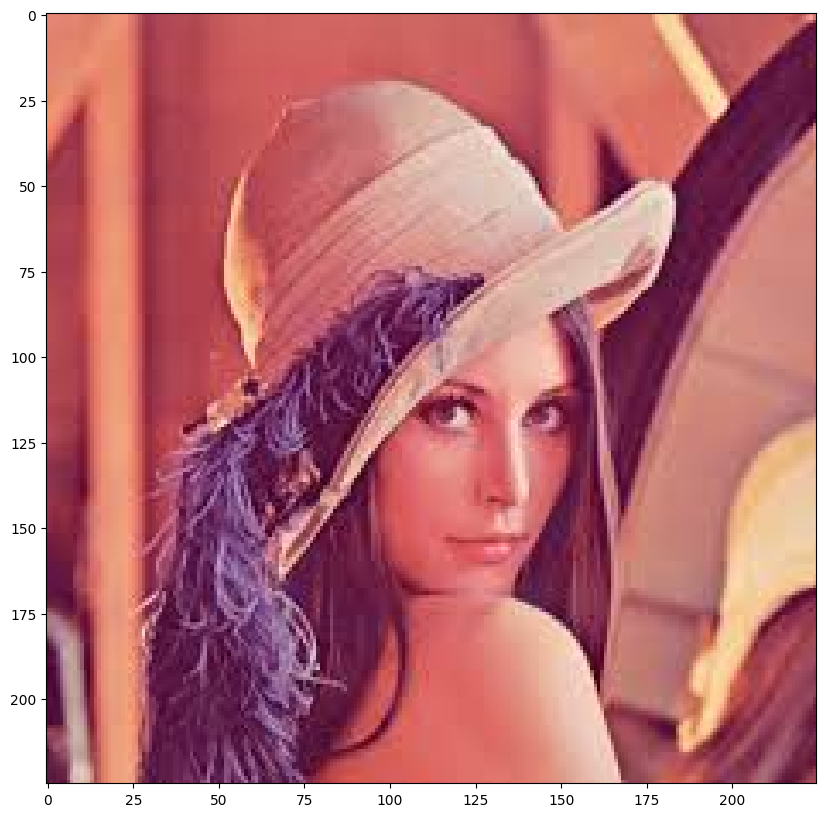

In [ ]:
plt.figure(figsize=(10,10))          # Tạo khung hiển thị kích thước 10x10
plt.imshow(array[:, 0:columns, :])   # Lấy một phần ảnh theo chiều rộng (từ cột 0 đến columns)
plt.show()                          # Hiển thị ảnh

If you want to reassign an array to another variable, you should use the `copy` method (we will cover this in the next section).


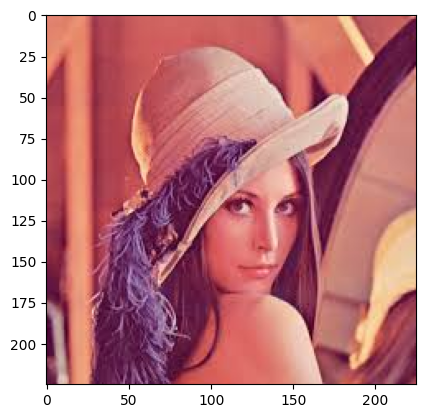

In [ ]:
A = array.copy()  # copy ảnh để không ảnh hưởng ảnh gốc
plt.imshow(A)
plt.show()

If we do not apply the method copy(), the variable will point to the same location in memory. Consider the array B. If we set all values of array A to zero, as B points to A, the values of B will be zero too:


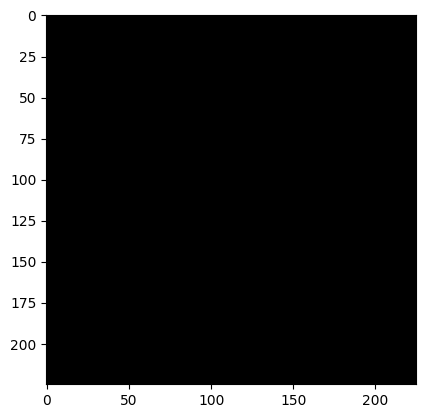

In [ ]:
B = A              # B trỏ cùng vùng nhớ với A
A[:,:,:] = 0       # gán toàn bộ pixel = 0 (ảnh đen)
plt.imshow(B)
plt.show()

We can also work with the different color channels. Consider the baboon image: 


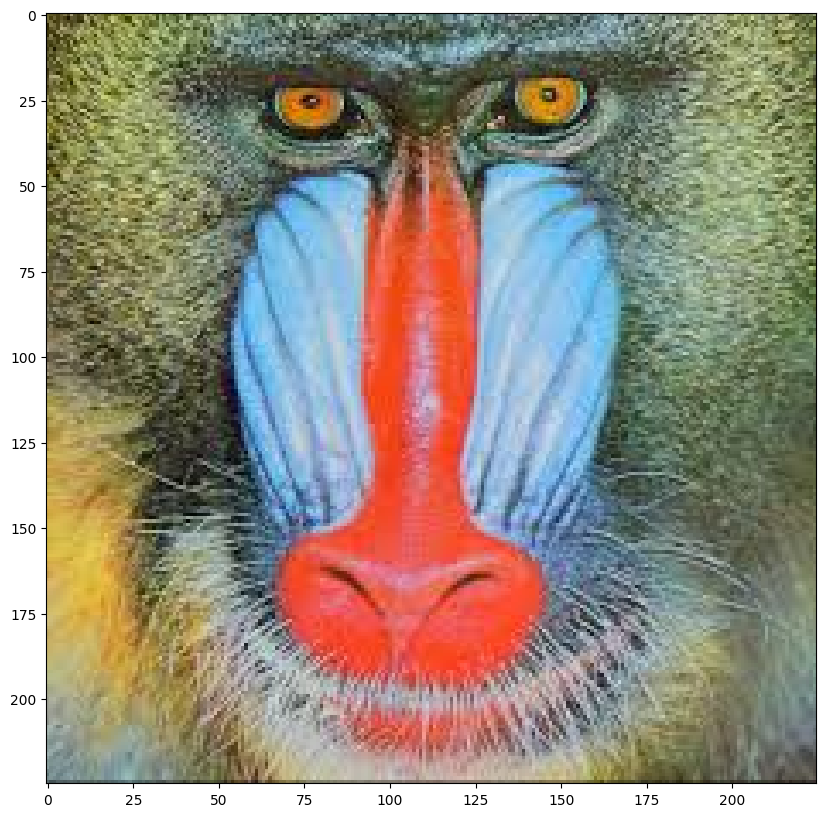

In [ ]:
baboon_array = np.array(baboon)   # Chuyển ảnh baboon từ Pillow sang mảng NumPy
plt.figure(figsize=(10,10))       # Tạo khung hiển thị kích thước 10x10
plt.imshow(baboon_array)          # Hiển thị ảnh từ mảng NumPy
plt.show()                        # Hiển thị ảnh ra màn hình

We can plot the red channel as intensity values of the red channel.


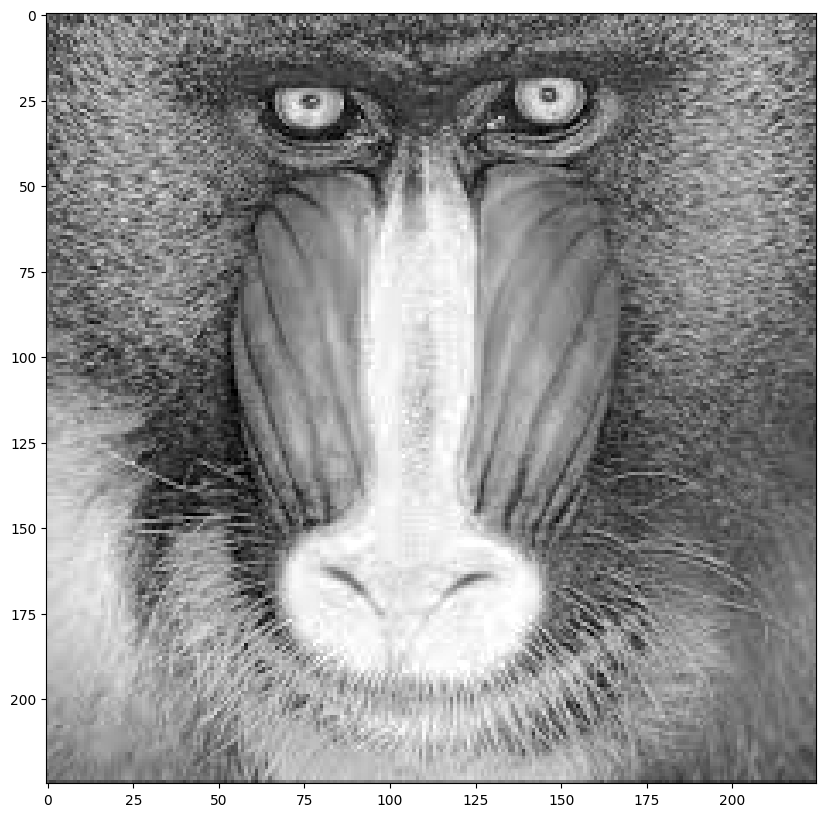

In [ ]:
baboon_array = np.array(baboon)        # Chuyển ảnh baboon sang mảng NumPy
plt.figure(figsize=(10,10))            # Tạo khung hiển thị 10x10
plt.imshow(baboon_array[:, :, 0], cmap='gray')  # Lấy kênh màu đỏ (channel 0), hiển thị dưới dạng ảnh xám
plt.show()    # Hiển thị ảnh


Or we can create a new array and set all but the red color channels to zero. Therefore, when we display the image it appears red:


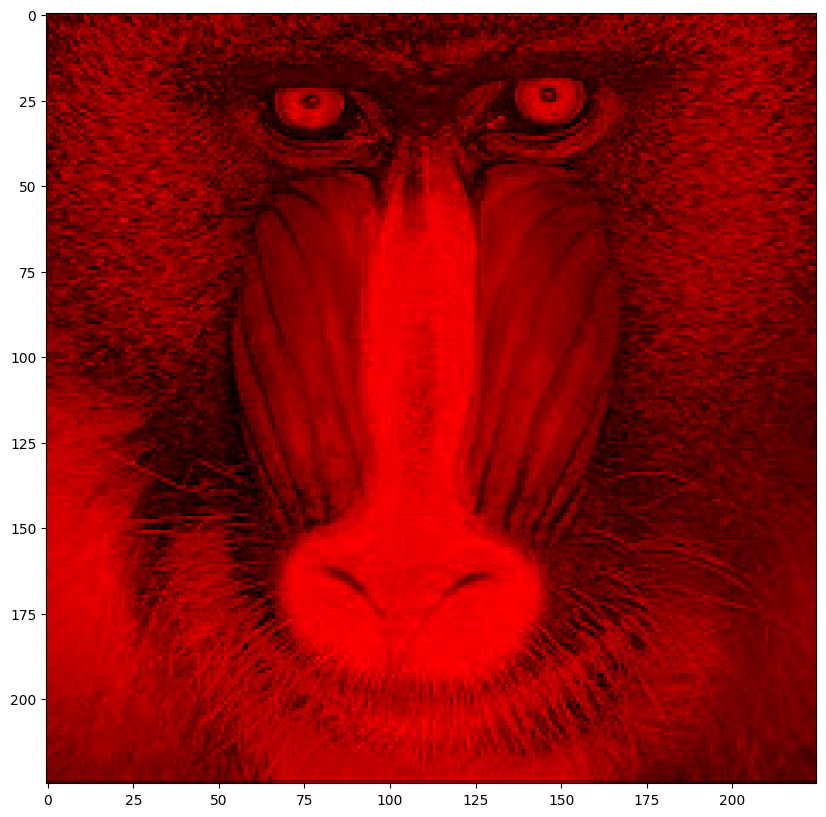

In [ ]:
baboon_red = baboon_array.copy()   # copy ảnh gốc để tránh làm thay đổi baboon_array
baboon_red[:,:,1] = 0              # đặt kênh Green (G) = 0
baboon_red[:,:,2] = 0              # đặt kênh Blue (B) = 0, chỉ còn kênh Red
plt.figure(figsize=(10,10))        # tạo khung hiển thị kích thước 10x10
plt.imshow(baboon_red)             # hiển thị ảnh chỉ chứa màu đỏ
plt.show()                         # vẽ ảnh ra màn hình

We can do the same for blue:


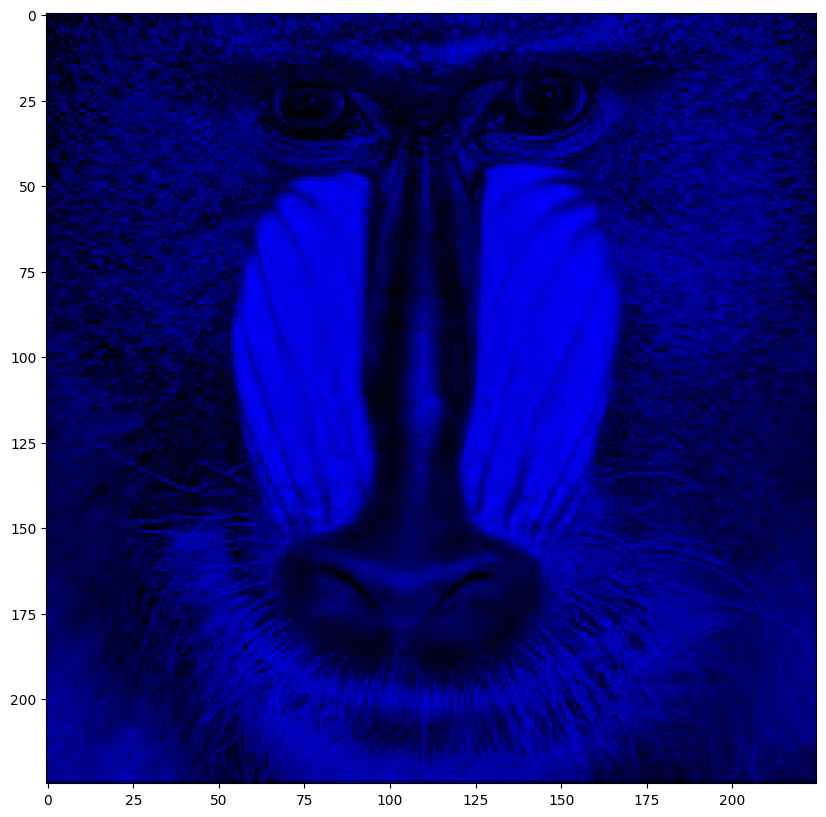

In [ ]:
baboon_blue = baboon_array.copy()   # copy ảnh gốc để không làm thay đổi baboon_array
baboon_blue[:,:,0] = 0              # đặt kênh Red (R) = 0
baboon_blue[:,:,1] = 0              # đặt kênh Green (G) = 0, chỉ giữ kênh Blue
plt.figure(figsize=(10,10))         # tạo khung hiển thị kích thước 10x10
plt.imshow(baboon_blue)             # hiển thị ảnh chỉ còn màu xanh dương
plt.show()                          # vẽ ảnh ra màn hình

### Question 1: 
Use the image `lenna.png` from this lab or take any image you like.

Open the image and create a PIL Image object called `blue_lenna`, convert the image into a numpy array we can manipulate called `blue_array`, get the blue channel out of it, and finally plot the image


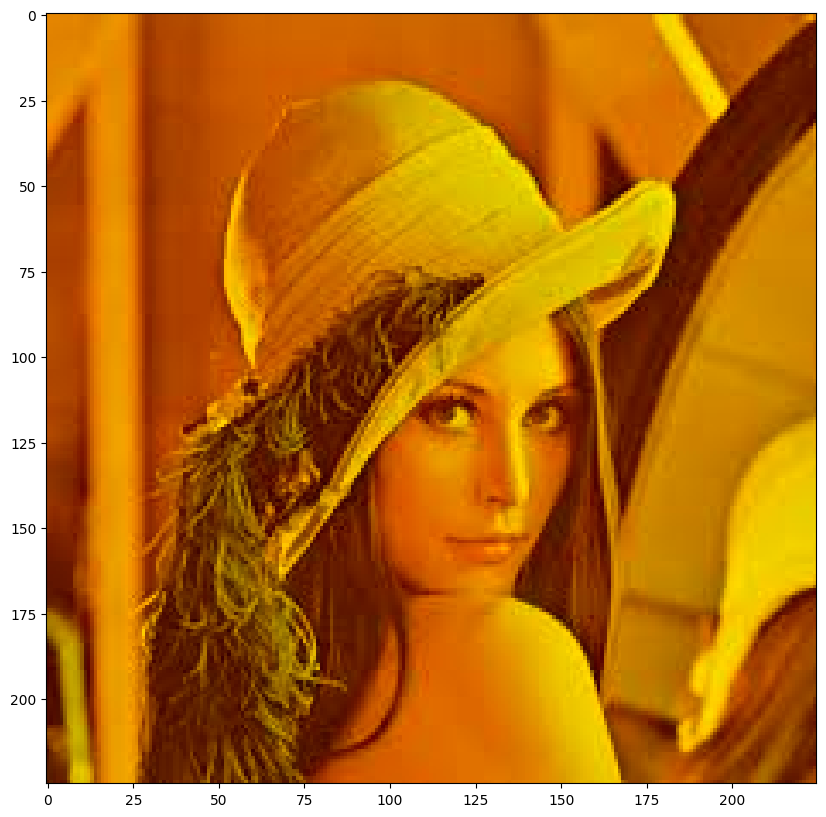

In [ ]:
image = Image.open('lenna.png')        # mở ảnh lenna.png bằng PIL
blue_array = np.array(image)          # chuyển ảnh PIL sang numpy array để thao tác
blue_array[:, :, 2] = 0               # loại bỏ (xóa) kênh màu xanh lam (Blue channel)
plt.figure(figsize=(10,10))            # tạo khung hiển thị kích thước 10x10
plt.imshow(blue_array)                # hiển thị ảnh sau khi đã bỏ kênh Blue
plt.show()                            # vẽ ảnh ra màn hình

Double-click **here** for a hint.

<!-- The hint is below:

blue_array[:,:,2] = 0

-->


Double-click **here** for the solution.

<!-- The answer is below:

blue_lenna = Image.open('lenna.png')
blue_array = np.array(blue_lenna)
blue_array[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(blue_array)
plt.show()

-->


# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).
